In [24]:
import pandas as pd
import pymysql
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import urllib.parse


In [3]:
agri = pd.read_csv(r"C:\Users\dell\Desktop\Jaya - Data Science\Project\agri\ICRISAT-District Level Data - AGRI Project.csv")

In [4]:
agri

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1,1966,14,Chhattisgarh,Durg,548.00,185.00,337.59,44.00,20.00,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.00,409.00,747.71,50.00,26.00,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.30,468.00,841.27,53.70,30.00,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.40,400.80,711.40,49.40,26.50,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.60,473.60,828.55,44.20,29.00,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16141,917,2013,15,Jharkhand,Singhbhum,267.06,579.70,2170.67,1.53,1.85,...,0.00,0.0,0.0,0.0,0.00,9.02,9.03,0.48,0.08,0.00
16142,917,2014,15,Jharkhand,Singhbhum,256.33,586.63,2288.57,5.36,6.65,...,0.00,0.0,0.0,0.0,0.00,8.63,8.64,0.46,0.04,0.00
16143,917,2015,15,Jharkhand,Singhbhum,263.21,264.71,1005.70,1.99,1.82,...,0.00,0.0,0.0,0.0,0.00,6.84,6.85,0.42,0.01,0.00
16144,917,2016,15,Jharkhand,Singhbhum,224.05,319.01,1423.84,0.38,0.83,...,0.00,0.0,0.0,0.0,0.03,6.40,6.43,0.03,0.01,0.00


In [5]:
agri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 80 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Dist Code                                    16146 non-null  int64  
 1   Year                                         16146 non-null  int64  
 2   State Code                                   16146 non-null  int64  
 3   State Name                                   16146 non-null  object 
 4   Dist Name                                    16146 non-null  object 
 5   RICE AREA (1000 ha)                          16146 non-null  float64
 6   RICE PRODUCTION (1000 tons)                  16146 non-null  float64
 7   RICE YIELD (Kg per ha)                       16146 non-null  float64
 8   WHEAT AREA (1000 ha)                         16146 non-null  float64
 9   WHEAT PRODUCTION (1000 tons)                 16146 non-null  float64
 10

In [6]:
agri.isnull().sum()

Dist Code                               0
Year                                    0
State Code                              0
State Name                              0
Dist Name                               0
                                       ..
VEGETABLES AREA (1000 ha)               0
FRUITS AND VEGETABLES AREA (1000 ha)    0
POTATOES AREA (1000 ha)                 0
ONION AREA (1000 ha)                    0
FODDER AREA (1000 ha)                   0
Length: 80, dtype: int64

In [7]:
agri.drop_duplicates()

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1,1966,14,Chhattisgarh,Durg,548.00,185.00,337.59,44.00,20.00,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.00,409.00,747.71,50.00,26.00,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.30,468.00,841.27,53.70,30.00,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.40,400.80,711.40,49.40,26.50,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.60,473.60,828.55,44.20,29.00,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16141,917,2013,15,Jharkhand,Singhbhum,267.06,579.70,2170.67,1.53,1.85,...,0.00,0.0,0.0,0.0,0.00,9.02,9.03,0.48,0.08,0.00
16142,917,2014,15,Jharkhand,Singhbhum,256.33,586.63,2288.57,5.36,6.65,...,0.00,0.0,0.0,0.0,0.00,8.63,8.64,0.46,0.04,0.00
16143,917,2015,15,Jharkhand,Singhbhum,263.21,264.71,1005.70,1.99,1.82,...,0.00,0.0,0.0,0.0,0.00,6.84,6.85,0.42,0.01,0.00
16144,917,2016,15,Jharkhand,Singhbhum,224.05,319.01,1423.84,0.38,0.83,...,0.00,0.0,0.0,0.0,0.03,6.40,6.43,0.03,0.01,0.00


In [8]:
agri.columns = agri.columns.str.replace(" ", "_").str.lower()

In [9]:
agri

,dist_code,year,state_code,state_name,dist_name,rice_area_(1000_ha),rice_production_(1000_tons),rice_yield_(kg_per_ha),wheat_area_(1000_ha),wheat_production_(1000_tons),...,sugarcane_yield_(kg_per_ha),cotton_area_(1000_ha),cotton_production_(1000_tons),cotton_yield_(kg_per_ha),fruits_area_(1000_ha),vegetables_area_(1000_ha),fruits_and_vegetables_area_(1000_ha),potatoes_area_(1000_ha),onion_area_(1000_ha),fodder_area_(1000_ha)
0,1,1966,14,Chhattisgarh,Durg,548.00,185.00,337.59,44.00,20.00,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.00,409.00,747.71,50.00,26.00,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.30,468.00,841.27,53.70,30.00,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.40,400.80,711.40,49.40,26.50,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.60,473.60,828.55,44.20,29.00,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16141,917,2013,15,Jharkhand,Singhbhum,267.06,579.70,2170.67,1.53,1.85,...,0.00,0.0,0.0,0.0,0.00,9.02,9.03,0.48,0.08,0.00
16142,917,2014,15,Jharkhand,Singhbhum,256.33,586.63,2288.57,5.36,6.65,...,0.00,0.0,0.0,0.0,0.00,8.63,8.64,0.46,0.04,0.00
16143,917,2015,15,Jharkhand,Singhbhum,263.21,264.71,1005.70,1.99,1.82,...,0.00,0.0,0.0,0.0,0.00,6.84,6.85,0.42,0.01,0.00
16144,917,2016,15,Jharkhand,Singhbhum,224.05,319.01,1423.84,0.38,0.83,...,0.00,0.0,0.0,0.0,0.03,6.40,6.43,0.03,0.01,0.00


In [10]:
agri = agri.drop(['fruits_area_(1000_ha)', 'vegetables_area_(1000_ha)', 'fruits_and_vegetables_area_(1000_ha)', 'potatoes_area_(1000_ha)', 'onion_area_(1000_ha)', 'fodder_area_(1000_ha)', 'barley_area_(1000_ha)', 'barley_production_(1000_tons)', 'barley_yield_(kg_per_ha)','chickpea_area_(1000_ha)', 'chickpea_production_(1000_tons)', 'chickpea_yield_(kg_per_ha)','pigeonpea_area_(1000_ha)', 'pigeonpea_production_(1000_tons)', 'pigeonpea_yield_(kg_per_ha)','minor_pulses_area_(1000_ha)', 'minor_pulses_production_(1000_tons)', 'minor_pulses_yield_(kg_per_ha)','safflower_area_(1000_ha)', 'safflower_production_(1000_tons)', 'safflower_yield_(kg_per_ha)','linseed_area_(1000_ha)', 'linseed_production_(1000_tons)', 'linseed_yield_(kg_per_ha)',], axis=1)

In [11]:
agri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 56 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   dist_code                                    16146 non-null  int64  
 1   year                                         16146 non-null  int64  
 2   state_code                                   16146 non-null  int64  
 3   state_name                                   16146 non-null  object 
 4   dist_name                                    16146 non-null  object 
 5   rice_area_(1000_ha)                          16146 non-null  float64
 6   rice_production_(1000_tons)                  16146 non-null  float64
 7   rice_yield_(kg_per_ha)                       16146 non-null  float64
 8   wheat_area_(1000_ha)                         16146 non-null  float64
 9   wheat_production_(1000_tons)                 16146 non-null  float64
 10

In [12]:
print(agri.head())

   dist_code  year  state_code    state_name dist_name  rice_area_(1000_ha)  \
0          1  1966          14  Chhattisgarh      Durg                548.0   
1          1  1967          14  Chhattisgarh      Durg                547.0   
2          1  1968          14  Chhattisgarh      Durg                556.3   
3          1  1969          14  Chhattisgarh      Durg                563.4   
4          1  1970          14  Chhattisgarh      Durg                571.6   

   rice_production_(1000_tons)  rice_yield_(kg_per_ha)  wheat_area_(1000_ha)  \
0                        185.0                  337.59                  44.0   
1                        409.0                  747.71                  50.0   
2                        468.0                  841.27                  53.7   
3                        400.8                  711.40                  49.4   
4                        473.6                  828.55                  44.2   

   wheat_production_(1000_tons)  ...  soyabe

In [13]:
username = 'root'              
password = 'Dhruv@2212'    
host = 'localhost'            
database = 'agriculture_db'

encoded_password = urllib.parse.quote_plus(password)

engine = create_engine(f"mysql+pymysql://{username}:{encoded_password}@{host}/{database}")
table_name = "crop_production"
agri.to_sql(table_name, con=engine, if_exists='replace', index=False, chunksize=1000)

print(f"✅ Edited data uploaded successfully to table '{table_name}' in database '{database}'!")

✅ Edited data uploaded successfully to table 'crop_production' in database 'agriculture_db'!


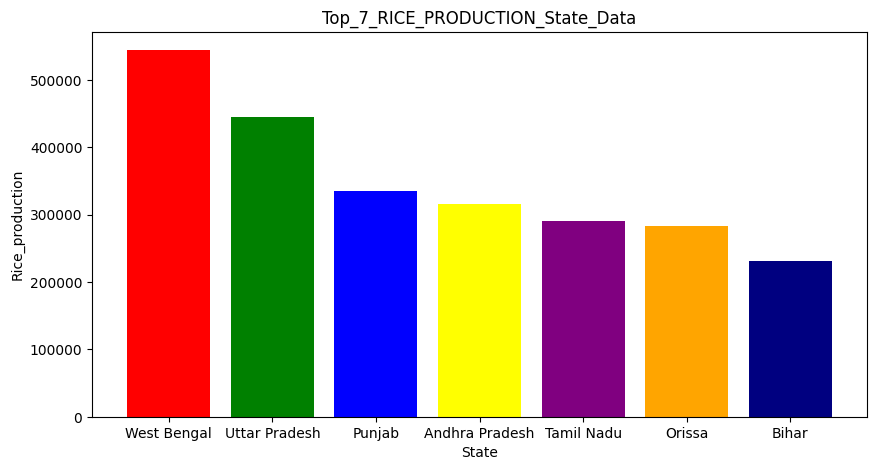

In [ ]:
#Top 7 RICE PRODUCTION State Data(Bar_plot)
plt.figure(figsize=(10,5))
top_rice = (agri.groupby("state_name")["rice_production_(1000_tons)"].sum().nlargest(7).reset_index()) 
plt.bar(top_rice["state_name"], top_rice["rice_production_(1000_tons)"], color=['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'navy']) 
plt.xlabel('State')
plt.ylabel('Rice_production')
plt.title("Top_7_RICE_PRODUCTION_State_Data")
plt.xticks(rotation=0)
plt.show()

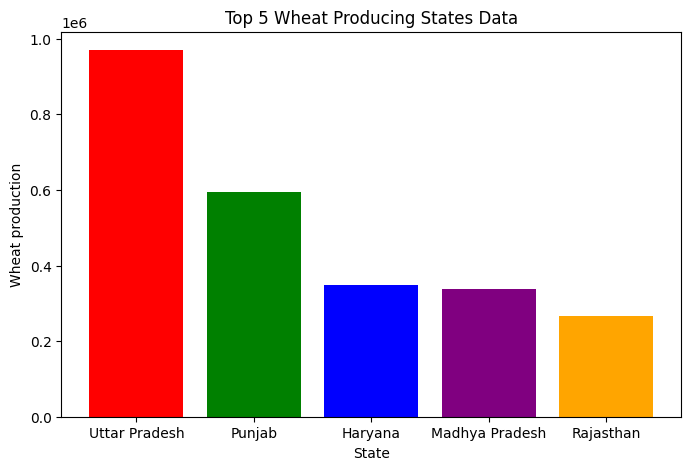

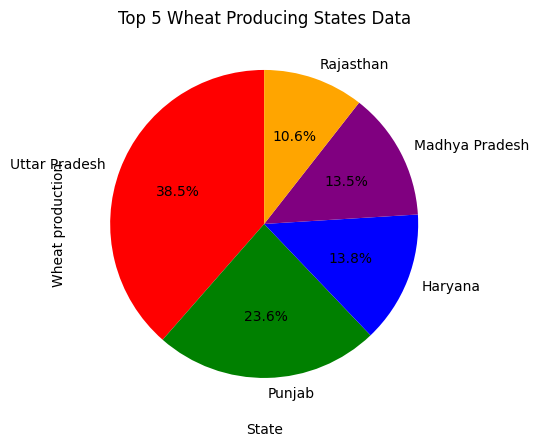

In [46]:
# Top 5 Wheat Producing States Data(Bar_chart)and its percentage(%)(Pie_chart)
top_wheat = (agri.groupby("state_name")["wheat_production_(1000_tons)"].sum().nlargest(5).reset_index())
plt.figure(figsize=(8,5))
plt.bar(top_wheat["state_name"], top_wheat["wheat_production_(1000_tons)"], color=['red', 'green', 'blue', 'purple', 'orange']) 
plt.xlabel('State')
plt.ylabel('Wheat production')
plt.title("Top 5 Wheat Producing States Data")
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(5,5))
plt.pie(top_wheat["wheat_production_(1000_tons)"], labels=top_wheat["state_name"],colors=['red', 'green', 'blue', 'purple', 'orange'], autopct='%1.1f%%', startangle=90)
plt.xlabel('State')
plt.ylabel('Wheat production')
plt.title("Top 5 Wheat Producing States Data")
plt.show()

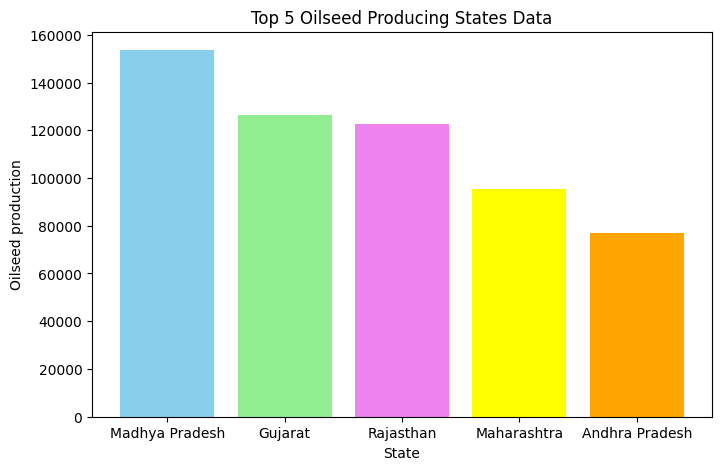

In [47]:
# Oil seed production by top 5 states
top_oilseeds = (agri.groupby("state_name")["oilseeds_production_(1000_tons)"].sum().nlargest(5).reset_index())
plt.figure(figsize=(8,5))
plt.bar(top_oilseeds["state_name"], top_oilseeds["oilseeds_production_(1000_tons)"], color=['skyblue', 'lightgreen', 'violet', 'yellow', 'orange']) 
plt.xlabel('State')
plt.ylabel('Oilseed production')
plt.title("Top 5 Oilseed Producing States Data")
plt.xticks(rotation=0)
plt.show()

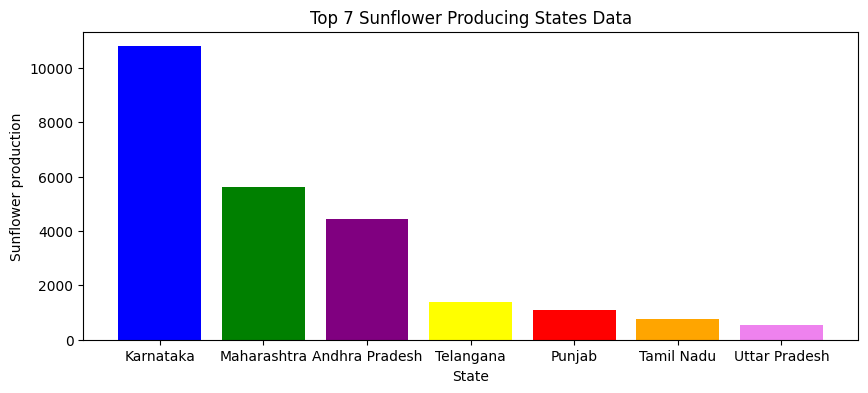

In [83]:
#Top 7 SUNFLOWER PRODUCTION  STATE
top_sunflower = (agri.groupby("state_name")["sunflower_production_(1000_tons)"].sum().nlargest(7).reset_index())
plt.figure(figsize=(10,4))
plt.bar(top_sunflower["state_name"], top_sunflower["sunflower_production_(1000_tons)"], color=['blue', 'green', 'purple', 'yellow', 'red', 'orange', 'violet']) 
plt.xlabel('State')
plt.ylabel('Sunflower production')
plt.title("Top 7 Sunflower Producing States Data")
plt.xticks(rotation=0)
plt.show()

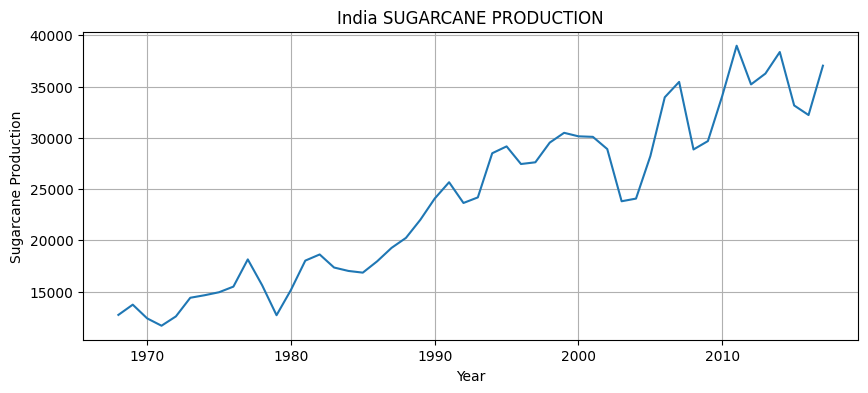

In [53]:
#India's SUGARCANE PRODUCTION From Last 50 Years(Line_plot)
sugarcane_yearly = (agri.groupby("year")["sugarcane_production_(1000_tons)"].sum().reset_index().sort_values("year").tail(50))
plt.figure(figsize=(10,4))
plt.plot(sugarcane_yearly["year"], sugarcane_yearly["sugarcane_production_(1000_tons)"])
plt.xlabel('Year')
plt.ylabel('Sugarcane Production')
plt.title("India SUGARCANE PRODUCTION")
plt.grid()

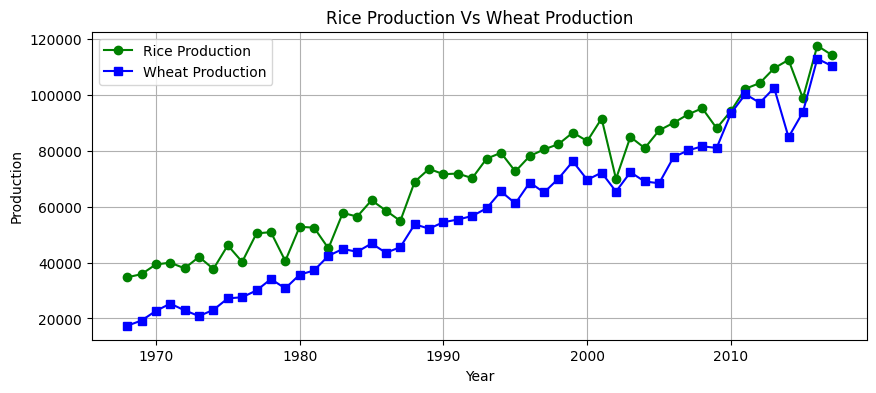

In [ ]:
# Rice Production Vs Wheat Production (Last 50y)
rice_production = (agri.groupby("year")["rice_production_(1000_tons)",].sum().reset_index().sort_values("year").tail(50))
wheat_production = (agri.groupby("year")["wheat_production_(1000_tons)"].sum().reset_index().sort_values("year").tail(50))
plt.figure(figsize=(10,4))
plt.plot(rice_production["year"], rice_production["rice_production_(1000_tons)"], label="Rice Production", color='green',marker='o')
plt.plot(wheat_production["year"], wheat_production["wheat_production_(1000_tons)"],label="Wheat Production", color='blue',marker='s')
plt.xlabel('Year')
plt.ylabel('Production')
plt.title("Rice Production Vs Wheat Production")
plt.legend()
plt.grid()

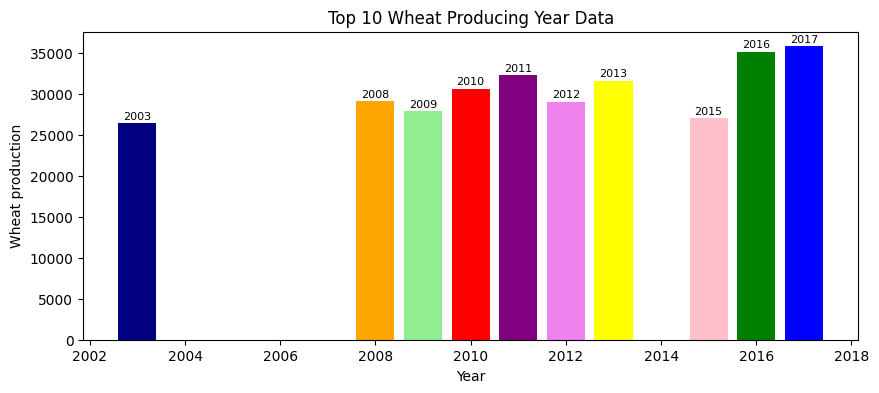

In [72]:
# Top 10 Wheat Production Years From UP
up_data = agri[agri["state_name"].str.lower() == "uttar pradesh"]
up_wheat = (up_data.groupby("year")["wheat_production_(1000_tons)"].sum().reset_index().sort_values(by="wheat_production_(1000_tons)", ascending=False))
top10_up_wheat = up_wheat.head(10)
plt.figure(figsize=(10,4))
plt.bar(top10_up_wheat["year"], top10_up_wheat["wheat_production_(1000_tons)"], color=['blue', 'green', 'purple', 'yellow', 'red', 'orange', 'violet', 'lightgreen', 'pink', 'navy']) 
plt.xlabel('Year')
plt.ylabel('Wheat production')
plt.title("Top 10 Wheat Producing Year Data")
plt.xticks(rotation=0)
for index, value in enumerate(top10_up_wheat["wheat_production_(1000_tons)"]):
    plt.text(top10_up_wheat["year"].iloc[index], value + 500, f"{top10_up_wheat['year'].iloc[index]}", ha="center", fontsize=8)
plt.show()

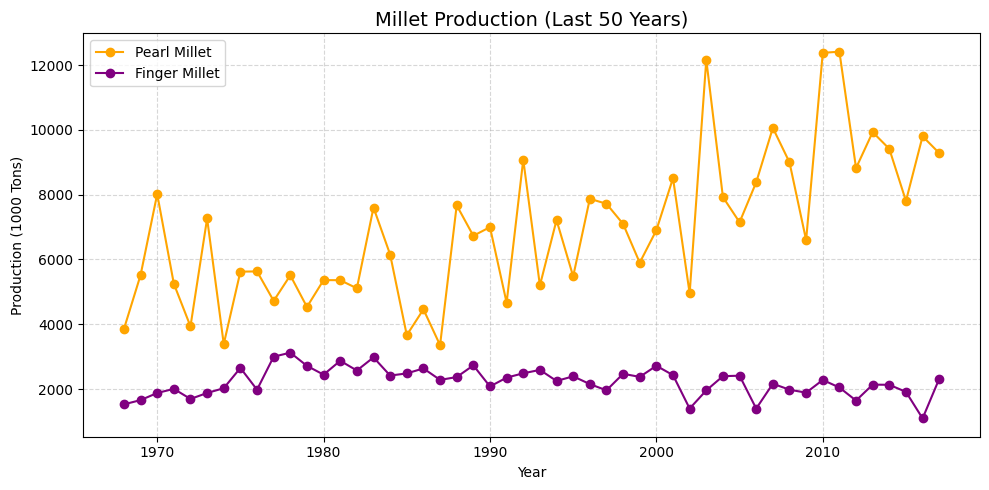

In [74]:
# Millet Production (Last 50y)
millet_data = (agri.groupby("year")[["pearl_millet_production_(1000_tons)", "finger_millet_production_(1000_tons)"]].sum().reset_index().sort_values("year").tail(50))
plt.figure(figsize=(10, 5))
plt.plot(millet_data["year"], millet_data["pearl_millet_production_(1000_tons)"], label="Pearl Millet", color="orange", marker="o")
plt.plot(millet_data["year"], millet_data["finger_millet_production_(1000_tons)"], label="Finger Millet", color="purple", marker="o")
plt.title("Millet Production (Last 50 Years)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Production (1000 Tons)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


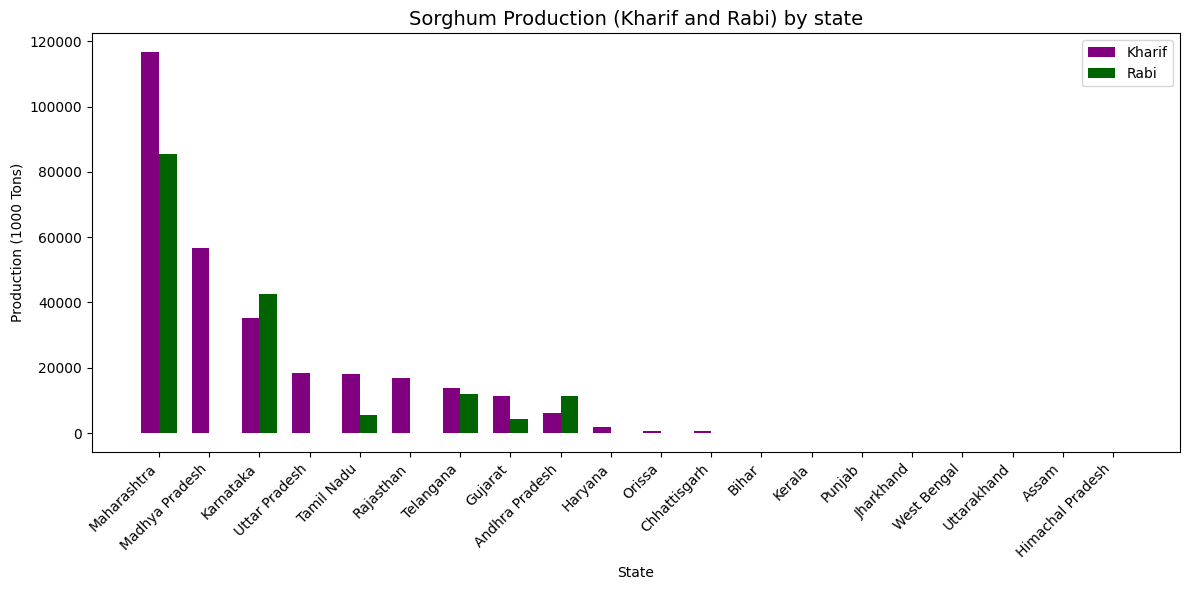

In [81]:
# Sorghum Production (Kharif and Rabi) by Region
sorghum_data = (agri.groupby("state_name")[["kharif_sorghum_production_(1000_tons)", "rabi_sorghum_production_(1000_tons)"]].sum().reset_index().sort_values("kharif_sorghum_production_(1000_tons)", ascending=False))
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = range(len(sorghum_data))
plt.bar(x, sorghum_data["kharif_sorghum_production_(1000_tons)"], width=bar_width, label="Kharif", color="purple")
plt.bar([i + bar_width for i in x],sorghum_data["rabi_sorghum_production_(1000_tons)"],width=bar_width,label="Rabi",color="darkgreen")
plt.xticks([i + bar_width / 2 for i in x], sorghum_data["state_name"], rotation=45, ha="right")
plt.title("Sorghum Production (Kharif and Rabi) by state", fontsize=14)
plt.xlabel("State")
plt.ylabel("Production (1000 Tons)")
plt.legend()
plt.tight_layout()
plt.show()

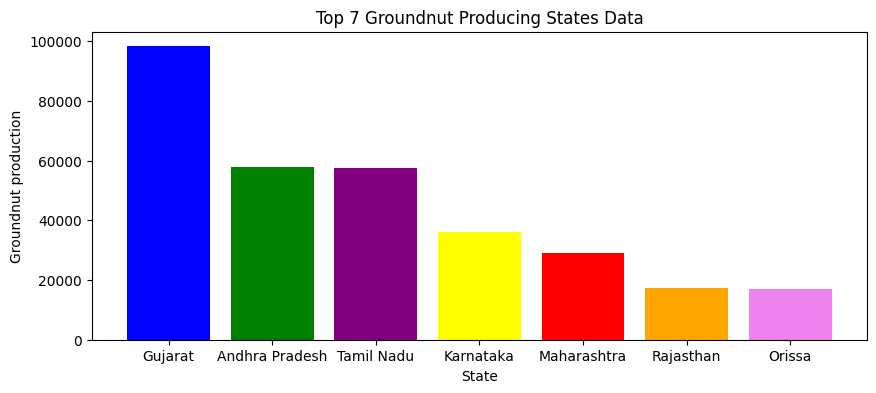

In [84]:
#Top 7 States for Groundnut Production
top_groundnut = (agri.groupby("state_name")["groundnut_production_(1000_tons)"].sum().nlargest(7).reset_index())
plt.figure(figsize=(10,4))
plt.bar(top_groundnut["state_name"], top_groundnut["groundnut_production_(1000_tons)"], color=['blue', 'green', 'purple', 'yellow', 'red', 'orange', 'violet']) 
plt.xlabel('State')
plt.ylabel('Groundnut production')
plt.title("Top 7 Groundnut Producing States Data")
plt.xticks(rotation=0)
plt.show()

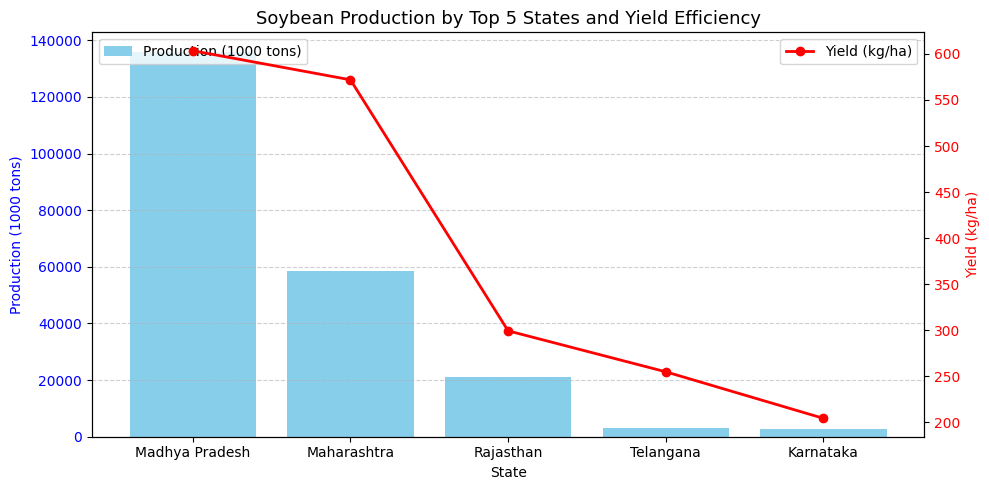

In [85]:
# Soybean Production by Top 5 States and Yield Efficiency
soybean_top5 = (agri.groupby('state_name')['soyabean_production_(1000_tons)'].sum().nlargest(5).reset_index())
soybean_yield_by_state = (agri.groupby('state_name')['soyabean_yield_(kg_per_ha)'].mean().reset_index())
soy_top5 = soybean_top5.merge(soybean_yield_by_state, on='state_name', how='left')
fig, graph1 = plt.subplots(figsize=(10, 5))
graph1.bar( soy_top5['state_name'], soy_top5['soyabean_production_(1000_tons)'], color='skyblue', label='Production (1000 tons)')
graph1.set_xlabel('State')
graph1.set_ylabel('Production (1000 tons)', color='blue')
graph1.tick_params(axis='y', labelcolor='blue')

graph2 = graph1.twinx()
graph2.plot(soy_top5['state_name'], soy_top5['soyabean_yield_(kg_per_ha)'], color='red', marker='o', linewidth=2, label='Yield (kg/ha)')
graph2.set_ylabel('Yield (kg/ha)', color='red')
graph2.tick_params(axis='y', labelcolor='red')

plt.title('Soybean Production by Top 5 States and Yield Efficiency', fontsize=13)
graph1.grid(axis='y', linestyle='--', alpha=0.6)
graph1.legend(loc='upper left')
graph2.legend(loc='upper right')
plt.tight_layout()
plt.show()


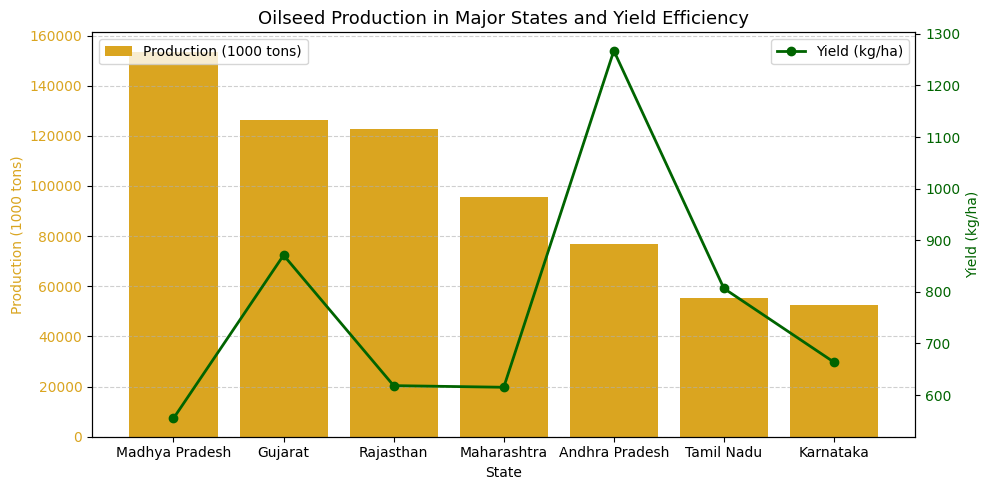

In [86]:
# Oilseed Production in Major States and Yield Efficiency
oilseed_top7 = (agri.groupby('state_name')['oilseeds_production_(1000_tons)'].sum().nlargest(7).reset_index())
oilseed_yield_by_state = (agri.groupby('state_name')['oilseeds_yield_(kg_per_ha)'].mean().reset_index())
oilseed_top7 = oilseed_top7.merge(oilseed_yield_by_state, on='state_name', how='left')

fig, graph1 = plt.subplots(figsize=(10, 5))
graph1.bar(oilseed_top7['state_name'], oilseed_top7['oilseeds_production_(1000_tons)'], color='goldenrod', label='Production (1000 tons)')
graph1.set_xlabel('State')
graph1.set_ylabel('Production (1000 tons)', color='goldenrod')
graph1.tick_params(axis='y', labelcolor='goldenrod')

graph2 = graph1.twinx()
graph2.plot(oilseed_top7['state_name'], oilseed_top7['oilseeds_yield_(kg_per_ha)'], color='darkgreen', marker='o', linewidth=2, label='Yield (kg/ha)')
graph2.set_ylabel('Yield (kg/ha)', color='darkgreen')
graph2.tick_params(axis='y', labelcolor='darkgreen')

plt.title('Oilseed Production in Major States and Yield Efficiency', fontsize=13)
graph1.grid(axis='y', linestyle='--', alpha=0.6)
graph1.legend(loc='upper left')
graph2.legend(loc='upper right')
plt.tight_layout()
plt.show()


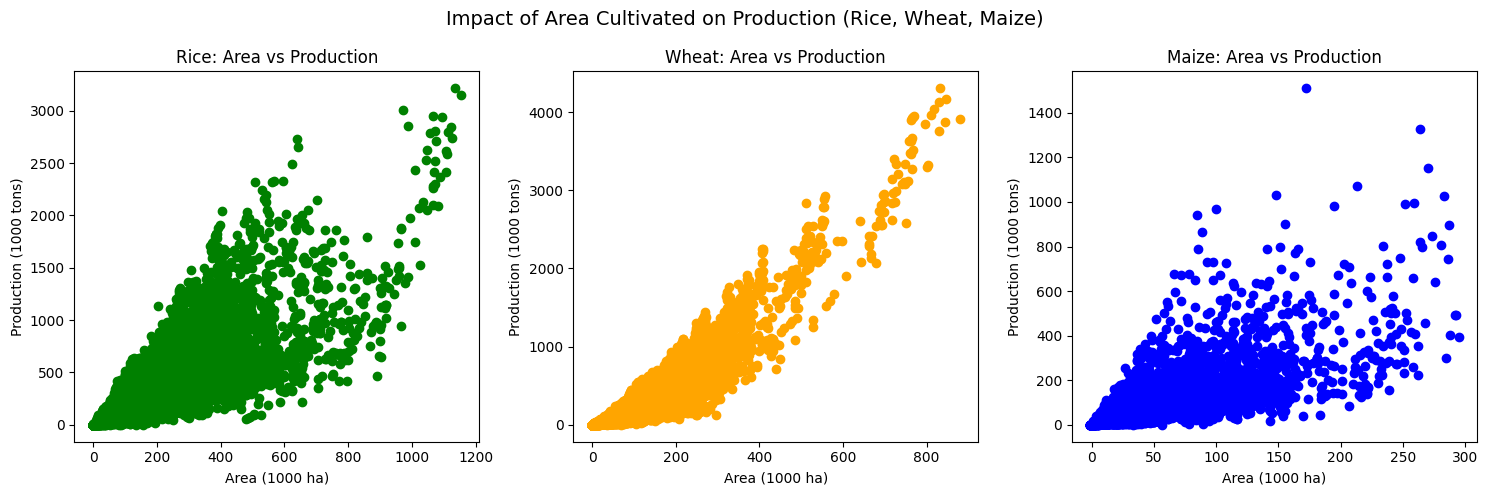

In [89]:
# Impact of Area Cultivated on Production (Rice, Wheat, Maize)
#rice
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(agri['rice_area_(1000_ha)'], agri['rice_production_(1000_tons)'], color='green')
plt.title('Rice: Area vs Production')
plt.xlabel('Area (1000 ha)')
plt.ylabel('Production (1000 tons)')

# Wheat
plt.subplot(1, 3, 2)
plt.scatter(agri['wheat_area_(1000_ha)'], agri['wheat_production_(1000_tons)'], color='orange')
plt.title('Wheat: Area vs Production')
plt.xlabel('Area (1000 ha)')
plt.ylabel('Production (1000 tons)')

# Maize
plt.subplot(1, 3, 3)
plt.scatter(agri['maize_area_(1000_ha)'], agri['maize_production_(1000_tons)'], color='blue')
plt.title('Maize: Area vs Production')
plt.xlabel('Area (1000 ha)')
plt.ylabel('Production (1000 tons)')

plt.suptitle('Impact of Area Cultivated on Production (Rice, Wheat, Maize)', fontsize=14)
plt.tight_layout()
plt.show()


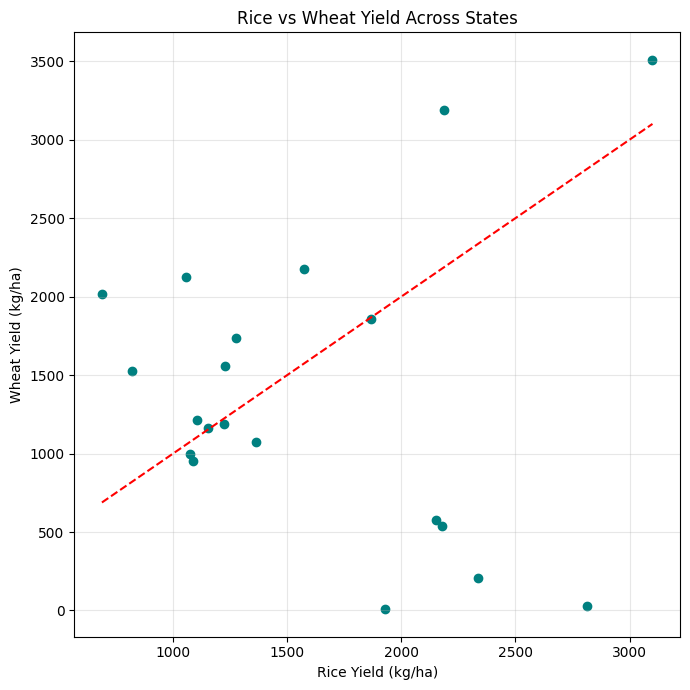

In [93]:
# Rice vs Wheat Yield Across States
yields = agri.groupby('state_name')[['rice_yield_(kg_per_ha)', 'wheat_yield_(kg_per_ha)']].mean().reset_index()

plt.figure(figsize=(7,7))
plt.scatter(yields['rice_yield_(kg_per_ha)'], yields['wheat_yield_(kg_per_ha)'], color='teal')
plt.xlabel('Rice Yield (kg/ha)')
plt.ylabel('Wheat Yield (kg/ha)')
plt.title('Rice vs Wheat Yield Across States')

plt.plot([yields['rice_yield_(kg_per_ha)'].min(), yields['rice_yield_(kg_per_ha)'].max()],
         [yields['rice_yield_(kg_per_ha)'].min(), yields['rice_yield_(kg_per_ha)'].max()],
         color='red', linestyle='--')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
